In [ ]:
import tensorflow as tf #텐서플로우 import

In [ ]:
#tf = 텐서플로우!

In [ ]:
import functools
import numpy as np

In [ ]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL) #keras -> TEST data를 csv 파일로 저장할거야~


16384/13049 [=====================================] - 0s 0us/step


In [ ]:
train_file_path

'/root/.keras/datasets/train.csv'

In [ ]:
test_file_path

'/root/.keras/datasets/eval.csv'

In [17]:
tf.__version__

'2.2.0'

In [19]:
keras.__version__

NameError: ignored

In [21]:
tf.keras.__version__ #케라스는 인공신경망

'2.3.0-tf'

In [65]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
#케라스 모듈들 가져오기!

In [67]:
x = np.linspace(0, 10, 10)
y = x + np.random.randn(*x.shape)

In [68]:
for a, b in zip(x,y):
    print((round(a,1), round(b,1)))

#zip 으로 2개 돌림,
#round 로 소수점 한개까지 짜름

(0.0, 0.5)
(1.1, 0.1)
(2.2, 0.7)
(3.3, 1.6)
(4.4, 4.6)
(5.6, 5.0)
(6.7, 7.6)
(7.8, 8.4)
(8.9, 8.6)
(10.0, 8.1)


In [69]:
model = Sequential()
#Sequential은 테두리

In [70]:
#layer를 쌓는다. = 뉴런네트워크의 신경말 레이어
model.add(Dense(input_dim=1, units=1, activation='linear', use_bias=False)) #딥러닝 신경망 레이어를 쌓는다. activation = linear(선형회귀)
#Dense = 각 층
#input_dim = 데이터의 구조
#오버피팅 되지 않도록, bias를 넣어줄 때도 있다. 기울기를 너무 딱 구해버리면 새로운 데이터 를 예측하지 못하잖아. 
#퍼셉트론 : 데이터가 들어가고 나오는 한 단위
#linear은 and 나 or 문제만 풀고 XOR 문제는 풀지못함

In [71]:
#회귀는(Regression)는 모든 데이터를 대표하는 식을 만들어가는 과정이다. -> 방정식을 찾고 -> 기울기를 찾는다
#기울기를 가지고 계속 내려오는 방식 : '경사하강법' -> 회귀는 경사하강법을 따른다. = 경사하강법은 미분으로 구해짐
#y = ax + b / a는 기울기임
# y= 2x + 3 / 이와같이 들어왔을때, y 값을 예측할 수 있잖아. 

#딥러닝 또한, 기울기를 찾아가는 과정이다. 

In [72]:
# SGD 는 경사하강법이고, lr = 는 내려오는 정도 (learning Rate)
# 경사하강법의 기준 
# loss : mse 는 그래프의 기울기가 점점 내려 갈때, '손실'을 최소화 시키겠다.= 손실함수(loss function)
# 손실함수를 이용하여, 해당 기울기를 선택했을 시 손실을 최소화 시키는 방법을 계산하여, 하강하게 된다. -> 기울기를 찾아간다.

#1. 회귀선을 그림 -> 예측을 하기 위함 -> 기울기를 그리는 것
#2. SGD는 경사하강법으로, 모델이 가장 예측을 잘하는 최적의 기울기를 찾아가는 것
#3. 손실함수를 이용하여, 경사하강법으로 내려갈때 손실을 최소화 시키는 것
sgd = optimizers.SGD(lr=0.05)
#옵티마이저는 학습을 지정
model.compile(optimizer='sgd', loss='mse')

In [73]:
weights = model.layers[0].get_weights() #가중치를 확인
weights

[array([[1.4882251]], dtype=float32)]

In [74]:
w = weights[0][0][0] #가중치를 0으로 다 설정

In [75]:
print('첫 설정된 기울기: ' + str(w))

첫 설정된 기울기: 1.4882251


In [76]:
model.fit(x,y, batch_size=10, epochs=10, verbose=1) #학습해보셈
#batch_size : 10개
#epoch 는 몇 번 내려올지

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 11.7074
Epoch 2/10
10/10 [==============================] - 0s 136us/step - loss: 1.9682
Epoch 3/10
10/10 [==============================] - 0s 189us/step - loss: 1.1131
Epoch 4/10
10/10 [==============================] - 0s 131us/step - loss: 1.0381
Epoch 5/10
10/10 [==============================] - 0s 136us/step - loss: 1.0315
Epoch 6/10
10/10 [==============================] - 0s 128us/step - loss: 1.0309
Epoch 7/10
10/10 [==============================] - 0s 133us/step - loss: 1.0309
Epoch 8/10
10/10 [==============================] - 0s 118us/step - loss: 1.0309
Epoch 9/10
10/10 [==============================] - 0s 121us/step - loss: 1.0309
Epoch 10/10
10/10 [==============================] - 0s 123us/step - loss: 1.0309


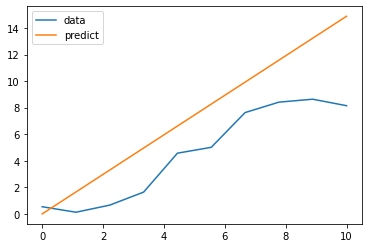

In [77]:
plt.plot(x, y, label='data')
plt.plot(x,w*x, label='predict') #딥러닝이 예측하는 값
plt.legend() #라벨을 보여줌
plt.show()

In [78]:
#선형에서는 정확도 체크를 (margin) 두 선간의 면적(공간)의 사이즈로 피팅이 얼마나 되었는지를 확인함

In [82]:
#1. 회귀란 무엇인가? 회귀란 과거의 데이터를 통해서 미래의 결과를 예측 하는 것이다. 
#2. 머신러닝과 딥러닝의 차이 : 머신러닝은 기계학습, 기계에게 데이터를 주고 학습시켜 결과를 맞추는 것이다. 딥러닝은 머신러닝이 심화된 단계로서, 인간의 신경망(뉴럴 네트워크를) 레이어와 노드로 구성하여 사고의 확장과 심화로 정ㄷ바을 맞추는 것이다.
#3. 텐서플로우 : 학습 과정에서 신경망의 구조까지 스스로 학습하여 스스로 변하게 할 수 있는 레이어구조의 라이브러리
#4. Keras(케라스)의 역할 : 파이썬으로 작성된 라이브러리로, 딥러닝 신경망을 구축하도록 도와준다. 텐서플로우에서 작동함.
#5. epoch(에포크)란? 몇번을 실행할지, 횟수를 정해주는 것
#6. 경사하강법은 언제 사용하는가? 무엇인가? 회구의 기울기를 찾아갈 때, 처음에 임의로 선정한 기울기에서 찾고자 하는 기울기를 찾아 점진적으로 내려가는 방법이다.
#7. 딥러닝의 optimizer는 무엇인가? 딥러닝을 하는 도중, 훈련의 크기를 조절하는 것
#8. 경사하강법에서 기울기를 왜 찾아가는가? 예측하고자 하는 값은 방정식의 기울기가 되기 때문이다.
#9. 일반적으로 회귀의 정확도를 구할때 사용하는 방법은? 답안이 되는 선과, 예측이 되는 선 사이의 만들어진 '면적'을 사용한다.
#10. 딥러닝에서 layer를 나타내는 객체이름은? dense
#11. 딥러닝에서 모든 입력을 가지고 처리 후 결과를 산출하는 하나의 단위는? 퍼셉트론
#12. 다음 중 컴퓨터가 제일 해결하기 어려워하는 문제는? OR, AND, XOR / XOR
#13. 하나의 레이어에 여러 퍼셉트론을 사용할 수 있다. O
#14. 하나의 퍼셉트론으론으로는 XOR 문제를 풀 수 없다.
#15. 여러 레이어인 경우 하나의 레이어에서 결정된 결과를 다음 레이어에서 어떻게 전달하는가? 가중치와 함께 전달함(=Weight)
 #각 레이어마다 가중치가 큰것들 중심으로 다음 레이어에 전달되고, 다음 레이어에서는 이 가중치를 사용하여 중간처리를 하게 됨.
 #레이어가 여러 개 인 경우, 각 레이어간 가중치를 지속적으로 전달하여 최종적으로 결과를 산출함(forward propagation, 순전파) <-> back propagation, 역전파(전달받은 가중치를 가지고 처리하는 중 고려했던 것보다 가중치가 크지 않은 경우, 이전 레이어에 가서 가중치를 다시 조절하는 방법임)
#16. 퍼셉트론 : 데이터가 들어가고 처리되는 하나의 단위(입, 처리, 출력) 